## A simple machine learning algorithm: the Perceptron

The following images are from https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975.

In [1]:
from IPython.display import HTML       # for embedding videos

The 'forward pass' of the Perceptron Learning Algorithm comprises two main steps:

1. Computing the pre-activation quantity, z: we multiply our covariates by the corresponding weights, and then add them up (this is essentially the same as computing w transpose dot x).

2. We then obtain our activation quantity, a, by applying our choice of activation function to z.

The following image illustrates this.

<img src='https://cdn-images-1.medium.com/max/800/1*Fyapb-JRFJ-VtnLYLLXCwg.png'>

The 'backward pass' then adjusts the weights *if* the forward pass gave us an incorrect answer.

If our output was too low (i.e. if we predicted 0 when the true label of the data point of interest was actually 1), we add the covariates to it (multiplied by the **learning rate**, which is missing below); if our output was too high, we subtract our covariates instead.

<img src='https://cdn-images-1.medium.com/max/800/1*PbJBdf-WxR0Dd0xHvEoh4A.png'>

In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vGwemZhPlsA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Dataset for classification: The Titanic Dataset

The Titanic dataset is a classic dataset that is often used for pedagogic purposes because of the straightforward nature of the data and the interpretabilty of the covariates.

In [5]:
import numpy as np
import pandas as pd

Data downloaded from https://www.kaggle.com/c/titanic/data

In [6]:
df = pd.read_csv("titanic.csv")

It is essential that we clean our training data and our test data in the same way, so we will combine the two datasets into one for cleaning, them separate thme back out for testing.

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
<br>1st = Upper
<br>2nd = Middle
<br>3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in the following way:
<br>Sibling = brother, sister, stepbrother, stepsister
<br>Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in the following way...
<br>Parent = mother, father
<br>Child = daughter, son, stepdaughter, stepson
<br>Some children travelled only with a nanny, therefore parch=0 for them.

**Embarked**: The particular port they embarked from.

In [8]:
len(set(df['Ticket']))

681

In [9]:
set(df['Cabin']) # We can use the set type to get unique values in any given Series.

{'A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

In [10]:
df['Cabin'].unique()    # Another way to do essentially the same thing.

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df[df['Cabin'] == 'B96 B98']    # We can query dataframes like so.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


Since 'Name' and 'PassengerId' are unique to each passenger, these covariates cannot help us establish whether or not a passenger survived, we shall remove those columns; and since there are so many values of 'Ticket', we will exclude it for much the same reason.

To do this, we shall use the pandas method '.drop'. With many of the libraries we will be learning, we will often refer to the documentation page for any given method or function that library offers, in order to a) know exactly what it does, b) what arguments it takes and c) how the function is intended to be used.

Let's visit this documentation page so we can see what they look like and how they're used.

The documentation page for .drop is here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [12]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

It seems that there are too many values of 'Cabin' for this to be all that helpful as it is. 

However, it might be helpful to segment groups of cabins according to the letter, and ignoring the accompanying number.

To do this, we must replace each value in the 'Cabins' column with the corresponding letter. We will use the 'replace' function, which is documented here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [13]:
newCol = df['Cabin'].replace(to_replace=['A.*', 'B.*', 'C.*', 'D.*', 'E.*', 'F.*', 'G.*'], 
                    value=['A', 'B', 'C', 'D', 'E', 'F', 'G'], regex=True, method=None)
newCol = newCol.fillna('.')
df['Cabin'] = newCol
df['Embarked'] = df['Embarked'].fillna('.')

### scikit-learn (AKA sklearn)

**scikit-learn** is by far the most widely used Python library for machine learning (at least, machine learning that doesn't involve deep neural networks).

We use sklearn for both data preprocessing as well as implementing the algorithms themselves. We'll do the later later - before then, we will see a few examples of using sklearn's provision for data preprocessing, starting with LabelBinarizer...

In order to use the categorical variables in this dataset in our machine learning algorithms, we must first convert them fron strings into data types that our algorithms can 'understand' - i.e., integers or floats. We use a technique called "one-hot encoding" to achieve this, which we do via sklearn's "LabelBinarizer" function, as follows.

(There is a good comparison of Sklearn's different functionalities for this here: https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder)

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
Sex_binarized = pd.DataFrame(LabelBinarizer().fit_transform(df['Sex']))
Cabin_binarized = pd.DataFrame(LabelBinarizer().fit_transform(df['Cabin']))
Embarked_binarized = pd.DataFrame(LabelBinarizer().fit_transform(df['Embarked']))

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,.,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,.,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,.,S


In [17]:
Sex_binarized.head()

,0
0,1
1,0
2,0
3,0
4,1


In [18]:
Cabin_binarized.head()

,0,1,2,3,4,5,6,7,8
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [19]:
Embarked_binarized.head()

,0,1,2,3
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


This works exactly as we would have liked it to, except that our columns have rather plain names! Also we cannot reintroduce these one-hot encoded dataframes back to our main dataframe without some more processing, since many columns have the same names.

We can easily give them names of our own, which we do in the following cell.

In [20]:
Sex_binarized.columns = ['Sex']
Cabin_binarized.columns = ['no_cabin', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
Embarked_binarized.columns = ['Unknown', 'C', 'Q', 'S']

In [21]:
# Make sure to remove the old columns, since they are no longer needed; then concatenate the new dataframes in

df = df.drop(['Sex', 'Cabin', 'Embarked'], axis=1)
df = pd.concat([df, Sex_binarized, Cabin_binarized, Embarked_binarized], axis=1)

In [22]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,no_cabin,A,B,C,D,E,F,G,T,Unknown,C,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X = df[[df.columns[1]] + list(df.columns[2:])]
y = df['Survived'] 

If we used all of our data to train our model, we wouldn't be able to test that model to see igf it performas well on unseen data. It is for this reason that we split our data into a subset for training, and a distiunct subset on hwich to train our model.

sklearn's 'train_test_split' function helps us easily do this.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Credit for PLA implementation below: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python

Machine Learning Mastery is a pretty good site - a fair few Google searches have led me to it and each time I've been impressed with how simply ML concepts are explained on there.

In [45]:
def predict(row, w, b):
    activation = np.dot(row, w.T)
    activation += b
    return 1.0 if activation >= 0.0 else 0.0

In [44]:
print(len(y_train))

596


In [55]:
import random    # a useful module in python, we'll use it to generate a random number for the bias below

In [53]:
def train_weights(X, learning_rate, epochs):
    global epoch_errors
    epoch_errors = []
    weights = np.random.rand(1, X.shape[1]) * 0.1
    global bias    # we'll need to use this bias later, so we make this variable global    
    bias = random.random() * 0.1       
    print('Initial weight vector: ' + str(weights))
    print(' ')
    for epoch in range(1, epochs + 1):
        sum_error = 0.0
        for index, row in X.iterrows():
            prediction = predict(row, weights, bias)
            error = y[index] - prediction
            sum_error += error**2
            for i in range(len(row)):
                weights[0, i] += learning_rate * error * row[i]
            bias += learning_rate * error
        epoch_errors.append(sum_error)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
    return weights

In [112]:
random.seed(3)   # our random seed ensures that everyone in the workshop gets the same 'random' number.
w = train_weights(X_train, 0.5, 200)

Initial weight vector: [[0.0477609  0.02920942 0.07227101 0.07143238 0.00941735 0.07308378
  0.08199179 0.05094867 0.07537079 0.0045919  0.01024337 0.06209277
  0.07288882 0.08387644 0.08611377 0.02145377 0.02130168 0.0117451
  0.03881301 0.08446995 0.06465142]]
 
>epoch=1, lrate=0.500, error=249.000
>epoch=2, lrate=0.500, error=238.000
>epoch=3, lrate=0.500, error=237.000
>epoch=4, lrate=0.500, error=226.000
>epoch=5, lrate=0.500, error=221.000
>epoch=6, lrate=0.500, error=234.000
>epoch=7, lrate=0.500, error=225.000
>epoch=8, lrate=0.500, error=225.000
>epoch=9, lrate=0.500, error=219.000
>epoch=10, lrate=0.500, error=209.000
>epoch=11, lrate=0.500, error=211.000
>epoch=12, lrate=0.500, error=209.000
>epoch=13, lrate=0.500, error=220.000
>epoch=14, lrate=0.500, error=214.000
>epoch=15, lrate=0.500, error=205.000
>epoch=16, lrate=0.500, error=207.000
>epoch=17, lrate=0.500, error=203.000
>epoch=18, lrate=0.500, error=199.000
>epoch=19, lrate=0.500, error=208.000
>epoch=20, lrate=0.500

We can use pyplot to plot our error as a function of the epoch number.

In [30]:
import matplotlib.pyplot as plt

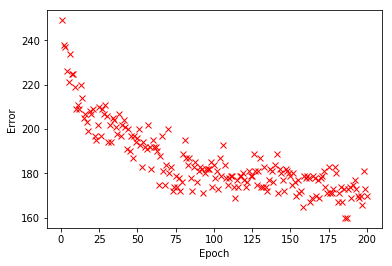

In [113]:
plt.plot(range(1, 201), epoch_errors, 'rx')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Or we can look at the same plot but with the y axis representing the percentage of incorrectly labelled instances if we prefer:

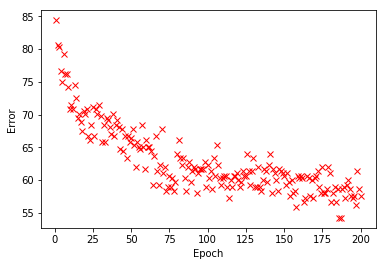

In [114]:
epoch_error_rate = [x*100 / len(y_test) for x in epoch_errors]

plt.plot(range(1, 201), epoch_error_rate, 'rx')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [115]:
random.seed(3)         # we need to ensure our bias below

correct_examples = 0
for index, row in X_test.iterrows():
    if y_test[index] == predict(row, w, bias):
        correct_examples += 1

In [116]:
print('Percent of data points in X_test correctly classified: ' + str(correct_examples / X_test.shape[0] * 100))

Percent of data points in X_test correctly classified: 59.32203389830508


## Using open source ML libraries in scikit-learn

We needn't write all of that code down every time we want to do machine learning: we can use open source libraries such as those of sci-kit learn to do machine learning much quicker!

In [35]:
from sklearn.linear_model import Perceptron

In [93]:
pt = Perceptron()                  
pt.fit(X_train, y_train)            # .fit if the method used in scikit-learn to train the classifier
pred = pt.predict(X_test)           # .predict is self-explanatory: it outputs a numpy array of predictions 
                                    # for each datapoint in the method argument

C:\Users\s1895125\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [79]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [94]:
print(accuracy_score(pred, y_test))

0.5932203389830508


It seems that our manual implementation of the PLA as well as sklearn's. This is only because we haven't tuned the hyperparameters yet - let's try that:

In [111]:
pt = Perceptron(max_iter=10)    # the learning rate is often denoted as alpha, which is the term sklearn uses  
pt.fit(X_train, y_train)
pred = pt.predict(X_test)
print(accuracy_score(pred, y_test))

0.7220338983050848


### K Nearest Neighbors (KNN)

scikit-learn provides many different classifiers, such as the 'lazy learner' K Nearest Neighbors.

K nearest neighbors is somewhat self-explanatory: it classifies any given data point according to the K (we define K) nearest labelled values. Whichever label appears most frequently among the K nearest neighbors is assigned to that new data point.

Here's an illustration of how KNN works:

<img src="http://houseofbots.com/images/news/2542/0img.png">

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(pred, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

It turns out that KNN performs better than the Perceptron! This isn't that surprising, considering the perceptron was invented in 1957 and is considered to be the very first machine learning algorithm. It is never used in any serious machine learning application, but is helpful to understand because a) many useful learning algorithms, such as linear regression, work in a similar way to the PLA and b) the preceptron is the fundamental building block of neural networks, which are *much* more effective.

We'll look at some more algorithms in the next notebook, and see that KNN performs still surprisingly well, even when compared to more modern techniques.